In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#Load the dataset
df = pd.read_csv("water-quality.csv", sep=";")
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [6]:
df.shape

(2861, 11)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


In [8]:
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

In [9]:
#converting to date-format
df["date"] = pd.to_datetime(df["date"],format='%d.%m.%Y')
#Adding the month and year column
df["month"]=df["date"].dt.month
df["year"] = df["date"].dt.year

In [10]:
df = df.sort_values(by=['id', 'date'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,month,year
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2,2000
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,5,2000
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,9,2000
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,12,2000
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,3,2001


In [11]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'month', 'year'],
      dtype='object')

In [12]:
pollutants=['O2', 'NO3', 'NO2', 'SO4','PO4', 'CL']

In [13]:
#Removing the null values
df=df.dropna(subset=pollutants)
df.isnull().sum()

id           0
date         0
NH4          2
BSK5         0
Suspended    2
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
month        0
year         0
dtype: int64

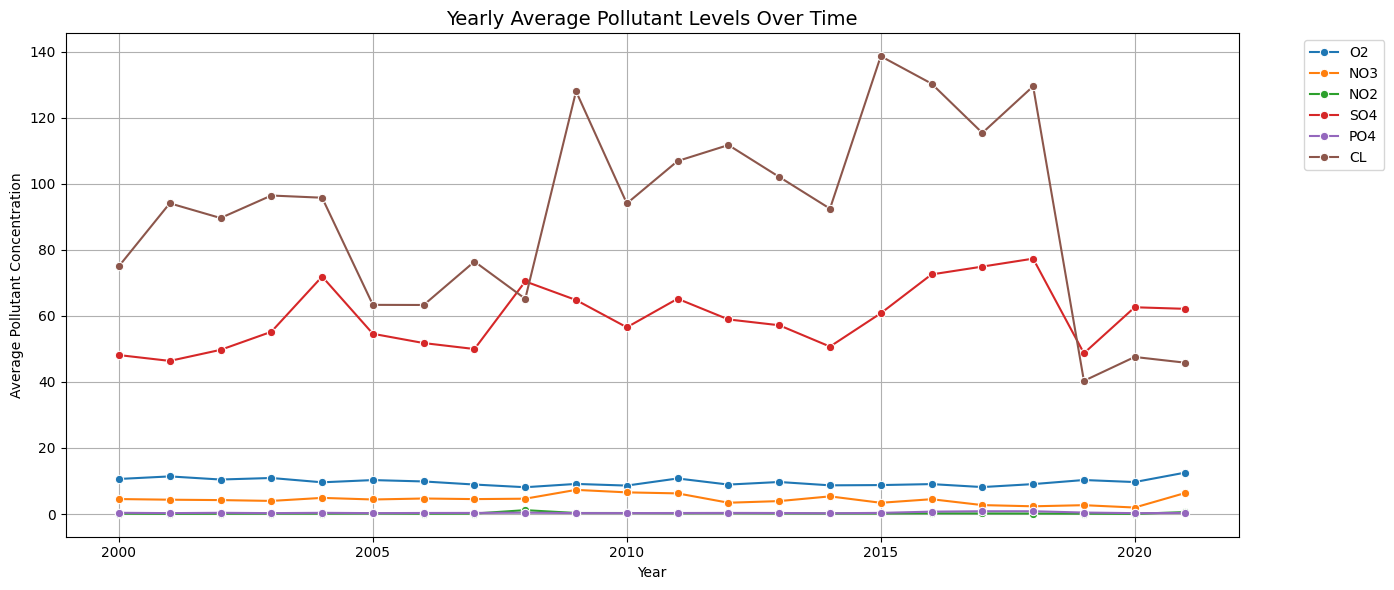

In [14]:
#Line Plot for Pollutants Over Multiple Years
pollutant_means_by_year = df.groupby('year')[pollutants].mean().reset_index()
melted_pollutants = pollutant_means_by_year.melt(id_vars='year', var_name='Pollutant', value_name='Average Value')
plt.figure(figsize=(14, 6))
sns.lineplot(data=melted_pollutants, x='year', y='Average Value', hue='Pollutant', marker='o', palette='tab10')

plt.title("Yearly Average Pollutant Levels Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Pollutant Concentration")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
# Feature and target selection
X=df[['id','year']]
Y=df[pollutants]

In [16]:
# Encoding - onehotencoder 
X_encoded=pd.get_dummies(X,columns=['id'],drop_first=True)

In [17]:
# Train, Test and Split
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded,Y,test_size=0.2,random_state=42)

In [18]:
#Training the model
model=MultiOutputRegressor(RandomForestRegressor(n_estimators=100,random_state=42))
model.fit(X_train,Y_train)

,estimator,RandomForestR...ndom_state=42)
,n_jobs,None
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0


In [19]:
# Evaluate model
y_pred = model.predict(X_test)

In [20]:
#Model performance
#MSE: how far off the model is from actual values (lower is better)
#R² score: how well the model explains variance in the data (higher is better)
print("Model Performance on the Test Data:")
for i, pollutant in enumerate(pollutants):
    print(f'{pollutant}:')
    print('MSE:', mean_squared_error(Y_test.iloc[:, i], y_pred[:, i]))
    print('R2:', r2_score(Y_test.iloc[:, i], y_pred[:, i]))
    print()

Model Performance on the Test Data:
O2:
MSE: 22.21825046040189
R2: -0.01674257045728833

NO3:
MSE: 18.153106746365886
R2: 0.5162032171220556

NO2:
MSE: 10.607352172601502
R2: -78.42066512350873

SO4:
MSE: 2412.139350033052
R2: 0.4118345603876148

PO4:
MSE: 0.38496938017964155
R2: 0.3221189891402043

CL:
MSE: 34882.81433245622
R2: 0.7357918194149974



In [21]:
#safety thresholds
safety_thresholds = {
    'O2': 5.0,     
    'NO3': 10,
    'NO2': 0.1,
    'SO4': 250,
    'PO4': 0.1,
    'CL': 250
}

#Function to classify water quality
def classify_water(row, thresholds):
    for pollutant, threshold in thresholds.items():
        value = row[pollutant]
        if pollutant == 'O2':
            if value < threshold:
                return 'Not Safe'
        elif value > threshold:
            return 'Not Safe'
    return 'Safe'

In [22]:
#Predict the pollutants in a specific station 
station_id = '5'
year_input = 2024

input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])

#align with training feature columns
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]  # reorder columns

predicted_pollutants = model.predict(input_encoded)[0]

#convert predicted values to a dictionary
predicted_dict = {p: val for p, val in zip(pollutants, predicted_pollutants)}

#evaluate water quality using classify_water()
safety_status = classify_water(predicted_dict, safety_thresholds)

print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input}:")
for p, val in predicted_dict.items():
    print(f"  {p}: {val:.2f}")
print("\nWater Quality Status:", safety_status)


Predicted pollutant levels for station '5' in 2024:
  O2: 14.05
  NO3: 6.32
  NO2: 0.05
  SO4: 50.21
  PO4: 0.30
  CL: 48.13

Water Quality Status: Not Safe


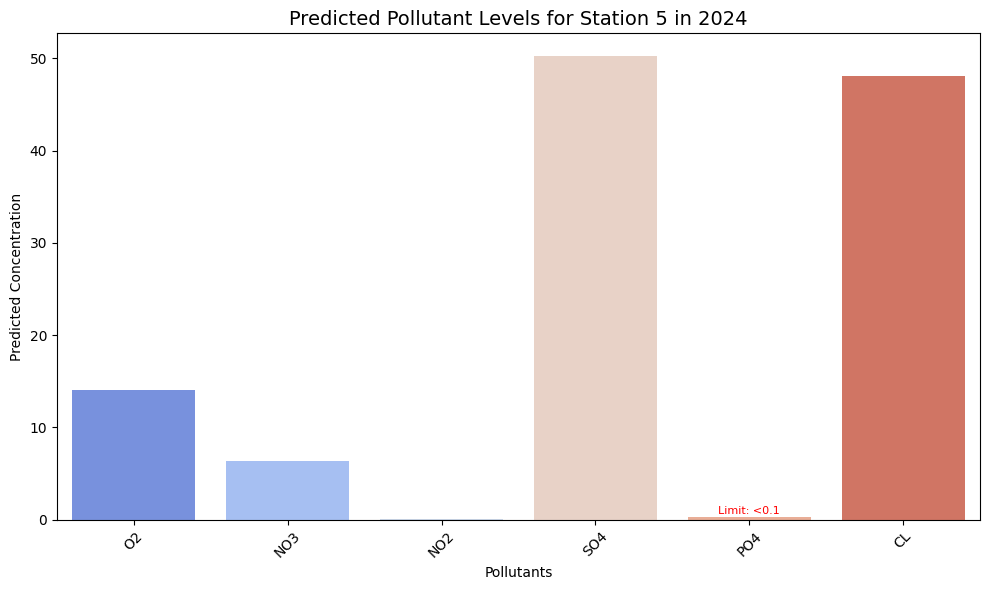

In [23]:
# Bar Plot – Compare All Predicted Pollutants 
prediction_df = pd.DataFrame({
    'Pollutant': pollutants,
    'Predicted Value': predicted_pollutants
})
plt.figure(figsize=(10, 6))
sns.barplot(data=prediction_df, x='Pollutant', y='Predicted Value', hue='Pollutant', palette='coolwarm', legend=False)

# Annotate unsafe values
for i, pollutant in enumerate(prediction_df['Pollutant']):
    predicted_val = predicted_dict[pollutant]
    threshold = safety_thresholds[pollutant]
    if pollutant == 'O2' and predicted_val < threshold:
        plt.text(i, threshold + 0.5, f"Limit: {threshold}", ha='center', color='red', fontsize=8)    
    elif pollutant != 'O2' and predicted_val > threshold:
        plt.text(i, threshold + 0.5, f"Limit: <{threshold}", ha='center', color='red', fontsize=8)

plt.title(f"Predicted Pollutant Levels for Station {station_id} in {year_input}", fontsize=14)
plt.xlabel("Pollutants")
plt.ylabel("Predicted Concentration")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Apply classification to the full dataset
df['Water Quality'] = df.apply(lambda row: classify_water(row, safety_thresholds), axis=1)
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,month,year,Water Quality
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2,2000,Not Safe
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,5,2000,Not Safe
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,9,2000,Not Safe
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,12,2000,Not Safe
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,3,2001,Not Safe


In [25]:
# Analyze Trends by Year & Station 
yearly_safety = df.groupby(['year', 'id'])['Water Quality'].value_counts().unstack().fillna(0)
yearly_safety['% Safe'] = yearly_safety['Safe'] / (yearly_safety['Safe'] + yearly_safety['Not Safe']) * 100
print("\nYearly Safety Overview:\n", yearly_safety.head())


Yearly Safety Overview:
 Water Quality  Not Safe  Safe     % Safe
year id                                 
2000 1              4.0   0.0   0.000000
     2              2.0   2.0  50.000000
     3             15.0   3.0  16.666667
     4             11.0   1.0   8.333333
     7              4.0   0.0   0.000000


In [26]:
#Seasonal Trends
monthly_safety = df.groupby('month')['Water Quality'].value_counts().unstack().fillna(0)
monthly_safety['% Safe'] = monthly_safety['Safe'] / (monthly_safety['Safe'] + monthly_safety['Not Safe']) * 100

yearly_overall = df.groupby('year')['Water Quality'].value_counts().unstack().fillna(0)
yearly_overall['% Safe'] = yearly_overall['Safe'] / (yearly_overall['Safe'] + yearly_overall['Not Safe']) * 100

#### Year-wise Trend of Safe Water Samples
##### This below line plot shows the trend of water safety over the years. A rising trend suggests improvements in water quality, while a decline may indicate increasing pollution levels or poor treatment. 

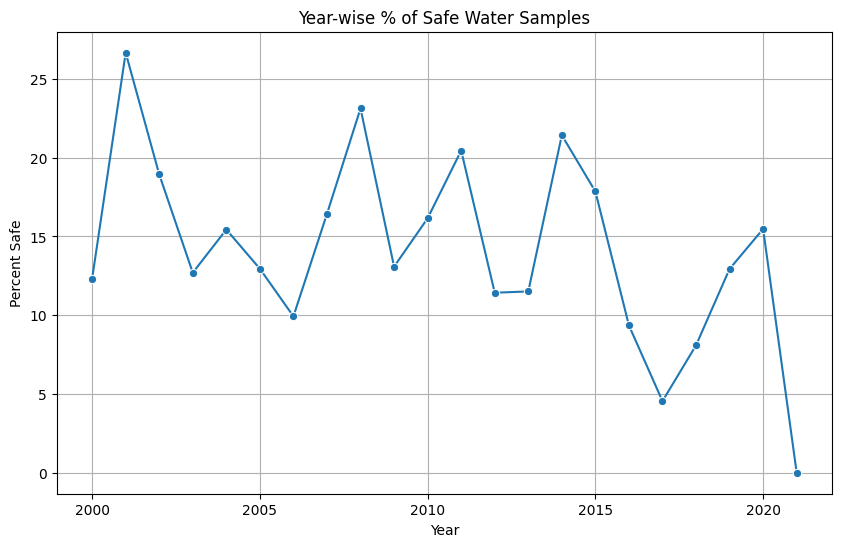

In [27]:
# Year-wise % of Safe Samples
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_overall, x=yearly_overall.index, y='% Safe', marker='o')
plt.title("Year-wise % of Safe Water Samples")
plt.xlabel("Year")
plt.ylabel("Percent Safe")
plt.grid(True)
plt.show()

#### Month-wise (Seasonal) Trend of Safe Samples
##### This seasonal trend helps identify how water safety changes month to month. Lower safety percentages in monsoon months could be due to runoff or overflow, while higher safety in winter could relate to reduced industrial activity.

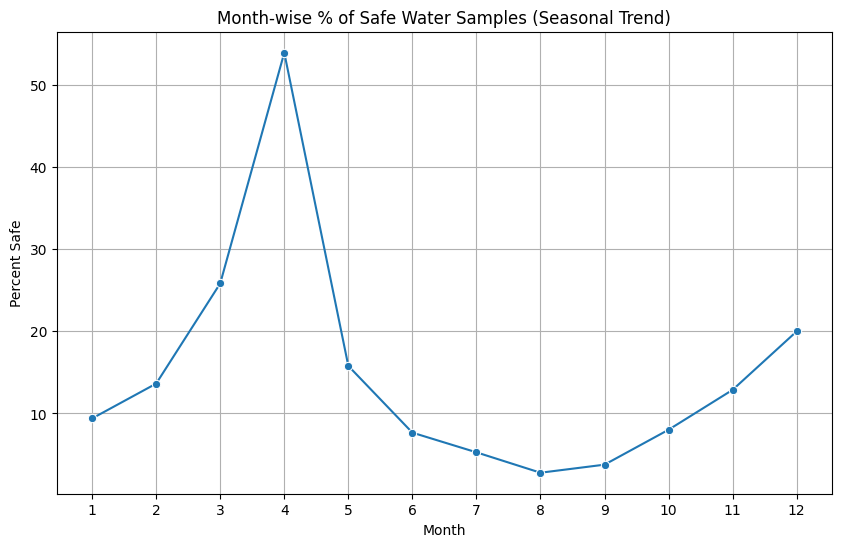

In [28]:
# Month-wise (Seasonal) % of Safe Samples
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_safety, x=monthly_safety.index, y='% Safe', marker='o')
plt.title("Month-wise % of Safe Water Samples (Seasonal Trend)")
plt.xlabel("Month")
plt.ylabel("Percent Safe")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

In [29]:
import joblib

joblib.dump(model, 'pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")
print('Model and cols structure are saved!')

Model and cols structure are saved!


In [30]:
df.to_csv("cleaned-data.csv", index=False)